<a href="https://colab.research.google.com/github/mknomics/soda/blob/main/Demand_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  #pandas is good for data manipulation.  I rename it here as "pd" to make it easier to call in the script below.  I could rename it anything I want but "pd" is standard
import matplotlib.pyplot as plt #matplotlib is a good package for graphing.  Again, I rename it plt to make coding more simple


import numpy as np #numpy is a good package for doing calculations
from sklearn.linear_model import LinearRegression  #sklearn is a package that is good at estimation.  Tons of models are available and here I import LinearRegression because that's all I need

pd.set_option('display.max_rows', None) # This is just configuring how pandas displays results.  Without this line of code then pandas would only display a partial set of the output when the output is long.  I want to see it all.

#Import a csv file from a target url:  What is a csv file?  Go to the url below to see the raw data.  columns are separated by a "," and the last column lacks a ","
data_url='https://raw.githubusercontent.com/mknomics/soda/main/soda.csv' # I define a string variable using apostrophe ' but I could ahve also used quotes " ".  I just cannot mix apostophe and quotes in the same line

df = pd.read_csv(data_url) # This line creates a pandas DataFrame that I defined as "df".  I could have called it anything I want

# Set my date objects.  This must be done so that 'date' is recognized as a date and not just a random string variable
df['date']=pd.to_datetime(df['date']) #make date a datetime object
df['year']=pd.DatetimeIndex(df['date']).year # I define a variable 'year' using the DatetimeIndex method
df['month']=pd.DatetimeIndex(df['date']).month # similarly I repeat and define 'month'




New Method: loc to slice the data
Call your data based on a condition using "loc" method

Conditions are { and = & ; or = | ; not = != , ~= and equal = "=="} YES I TYPED TWO EQUAL SIGNS IN THE LAST CONDITION
Syntax for single condition is: "df[(condition 1)]"
Syntax for multiple conditions are: "df[(condition 1) logical operator (condition 2)]"

# To make it easier, let's aggregate up, from the city-product-shop level to the city-product level.
### One way to do this is to average prices and quantities.

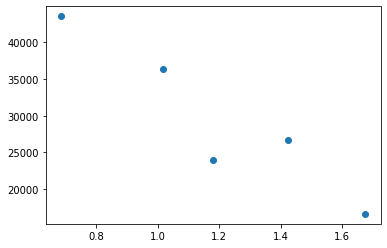

In [ ]:
df_Q = df.groupby(['brand'])['quantity'].mean().reset_index()# 
df_P = df.groupby(['brand'])['price'].mean().reset_index()
df3 = pd.merge(df_Q, df_P)
plt.scatter(df3['price'], df3['quantity'])
plt.show()

In [ ]:
#Step 1: use groupby method and define a new dataframe for each of the metrics that we are interested in
df_mean_Q = df.groupby(['brand','container','city','date'])['quantity'].mean().reset_index()# I reset the index for each new data set.  Don't worry if the indexing is confusing since it isn't the main point here
df_mean_P = df.groupby(['brand','container','city','date'])['price'].mean().reset_index()

In [ ]:
# Step 2: the data frames from Step #1 can be merged by their unique rows.  Rows are unique by city x brand x container x date
df2 = pd.merge(df_mean_Q, df_mean_P) # merges df_total_Q dataframe with df_mean_P dataframe based on their unique rows

# Now let's rename the price and quantity column so we don't get confused later about what we are looking at
df2.rename(columns={'quantity': 'mean_Q', 'price': 'mean_P'},inplace=True) # I 

# we lost our columns df['year'] and df['month'] so lets add these back
df2['year']=pd.DatetimeIndex(df2['date']).year # I define a variable 'year' using the DatetimeIndex method
df2['month']=pd.DatetimeIndex(df2['date']).month # similarly I repeat and define 'month'

# Towards building your own functions
### Step 1) build a scatter plot
### Step 2) write a function that builds the plot automatically based on inputs

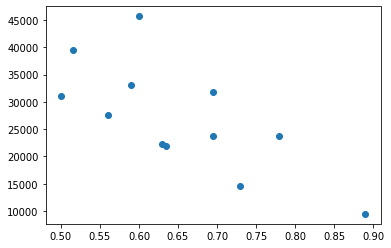

In [ ]:
# Step 1) Build a scatter plot

# Style Point:  Instead of packing everything in one line, I can also define objects over several lines to help readability 
market_geo = (df2['city']=='Athens')
market_prod = (df2['container']=='can') 
market_brand = (df2['brand']=='adult-cola')
market_year = (df2['year']==2015)
micro_market = market_geo & market_prod & market_brand & market_year 

plt.scatter(df2.loc[micro_market]['mean_P'], df2.loc[micro_market]['mean_Q'])
plt.show()


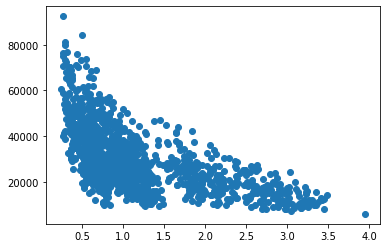

# Step 2) Now define a function that makes the plot 
### 1) The function takes arguments you define.  I initialize these to "True" so that the function accepts a wide range of values
### 2) The funtion ends by calling "return" anything you type in the return line will be what the function returns when it is called
### 3) Notice all lines of the function are indented

In [ ]:
def market_scatter(city=True, container=True, brand=True, year=True):
  # Instead of packing everything in one line, I can also define objects over several lines
  market_geo = (df2['city']==city)
  market_prod = (df2['container']==container) 
  market_brand = (df2['brand']== brand)
  market_year = (df2['year']==year)
  micro_market = market_geo & market_prod & market_brand & market_year 

  plt.scatter(df2.loc[micro_market]['mean_P'], df2.loc[micro_market]['mean_Q'])
  #add title and axis labels
  plt.title('Price and Quantity for'+ ' ' +str(city)+ ' ' +str( container)+ ' ' + str( brand)+ ' ' + str(year))
  plt.xlabel('Quantity')
  plt.ylabel('Price')

  #display plot
  plt.show() 
  return plt.show()



# Cool thing about functions - they clean up redundant code
Now you can simply call all of these lines of code with a single line 

---



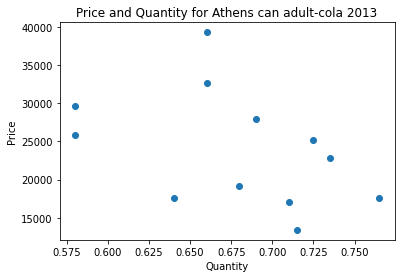

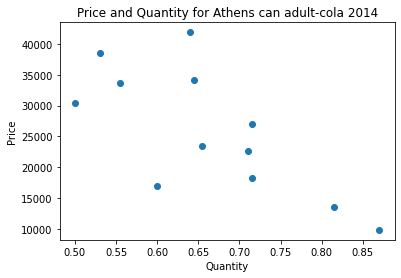

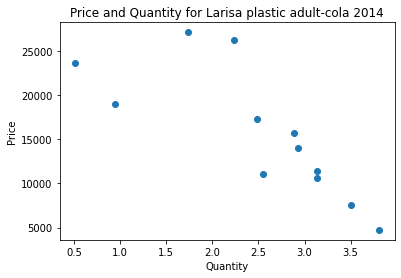

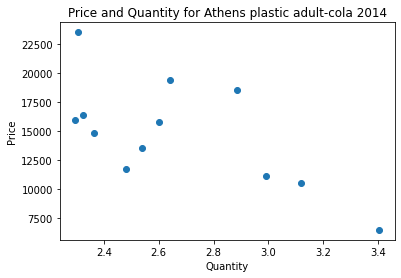

In [ ]:
market_scatter(city='Athens', container='can', brand='adult-cola', year=2013)
market_scatter(city='Athens', container='can', brand='adult-cola', year=2014)
market_scatter(city='Larisa', container='plastic', brand='adult-cola', year=2014)
market_scatter(city='Athens', container='plastic', brand='adult-cola', year=2014)

# Linear Regression Methods

## What is the best fit line that can possibly be made given the data?  

# $Y = \beta_x X + \beta_0 + \epsilon$
## Think $Y=mX+b$ where $m=\beta_x$ and $b=\beta_0$ and $\epsilon$ is an error term

## If the data is given then a line is defined by the coefficients $\beta_x , \beta_0$

### Find the "best" values of $\beta_x , \beta_0$.  where "best" minimizes statistical error $\epsilon$

How can we sum up all errors?  Some are positive and some are negative?  Solution: define the error as the squared error loss $$\sum\epsilon^2$$ 

# Make a regression function that simply modifies the plot function

In [ ]:
def market_regression(city=True, container=True, brand=True, year=True):
  # Instead of packing everything in one line, I can also define objects over several lines
  market_geo = (df2['city']==city)
  market_prod = (df2['container']==container) 
  market_brand = (df2['brand']== brand)
  market_year = (df2['year']==year)
  micro_market = market_geo & market_prod & market_brand & market_year 

  # define independent variable X
  X = df2.loc[micro_market]['mean_Q'].values.reshape(-1,1) #convert to numpy array using "values"
  # define dependent variable Y
  Y = df2.loc[micro_market]['mean_P'].values.reshape(-1,1)

  linear_regression = LinearRegression() # Create a linear_regression object
  linear_regression.fit(X , Y)  # Fit the model
  Y_pred = linear_regression.predict(X)  # Fits the Data Points "X" with the parameters from the Fit step to form a prediction

  plt.scatter(X, Y)
  plt.plot(X, Y_pred, color='red')

  #plt.scatter(df2.loc[micro_market]['mean_P'], df2.loc[micro_market]['mean_Q'])
  #add title and axis labels
  plt.title('Price and Quantity for'+ ' ' +str(city)+ ' ' +str( container)+ ' ' + str( brand)+ ' ' + str(year))
  plt.xlabel('Quantity')
  plt.ylabel('Price')

  #display plot
  return plt.show()



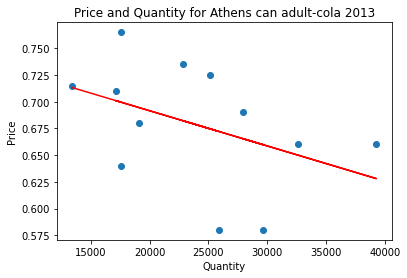

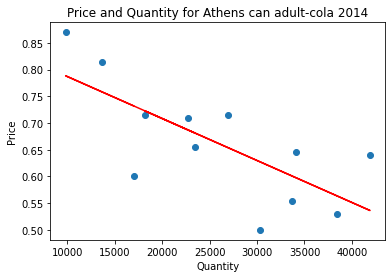

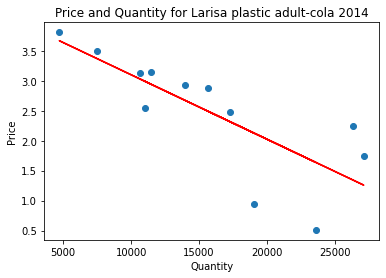

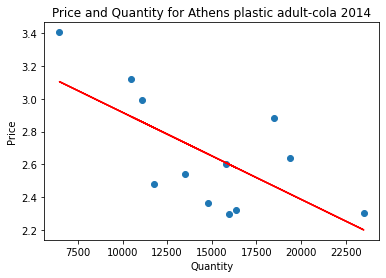

In [ ]:
market_regression(city='Athens', container='can', brand='adult-cola', year=2013)
market_regression(city='Athens', container='can', brand='adult-cola', year=2014)
market_regression(city='Larisa', container='plastic', brand='adult-cola', year=2014)
market_regression(city='Athens', container='plastic', brand='adult-cola', year=2014)

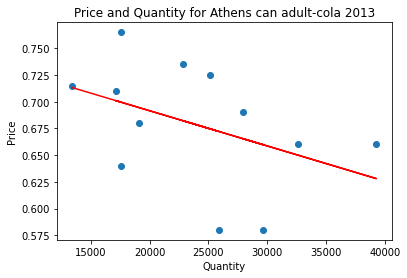

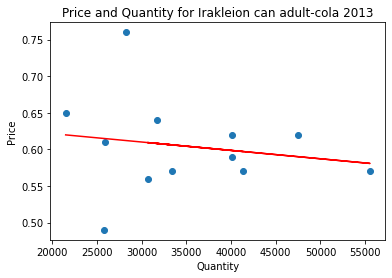

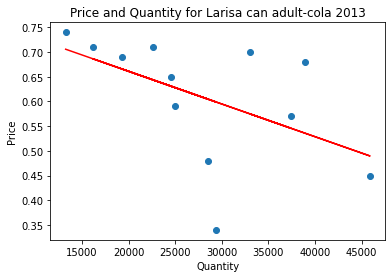

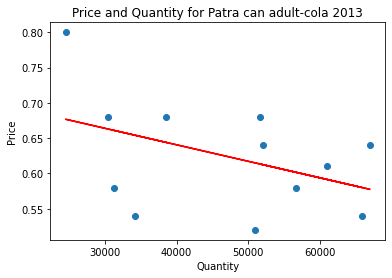

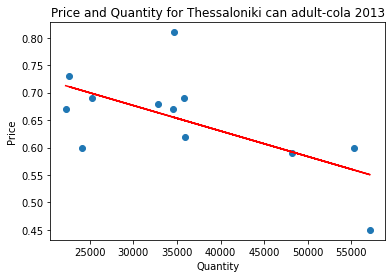

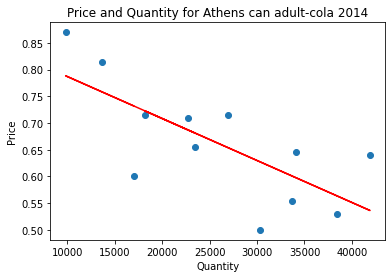

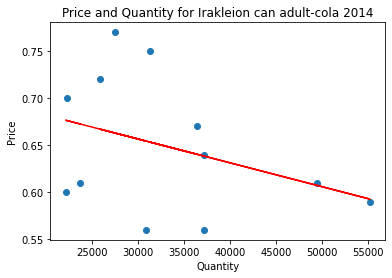

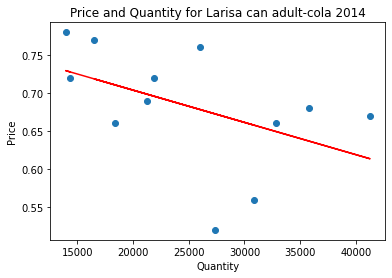

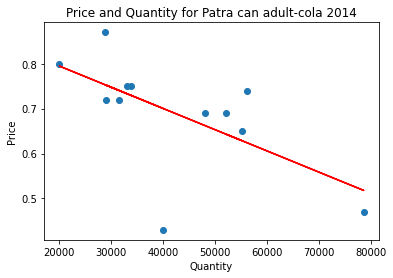

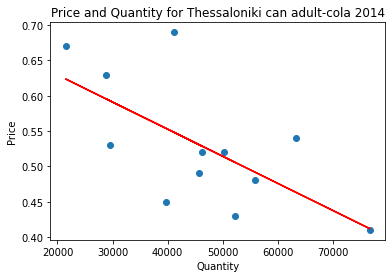

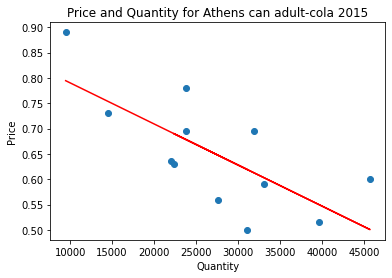

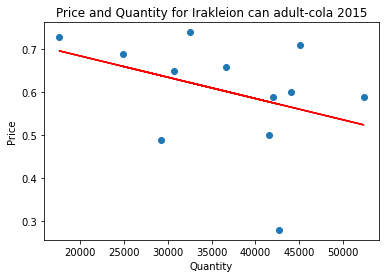

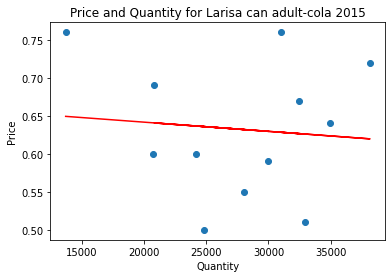

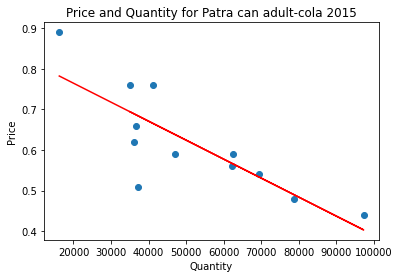

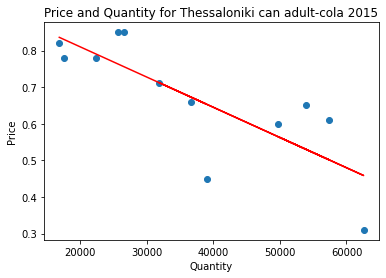

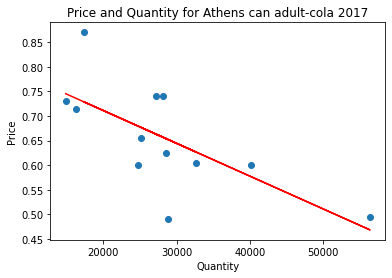

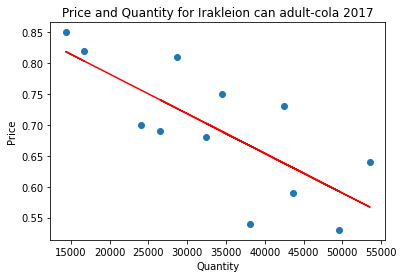

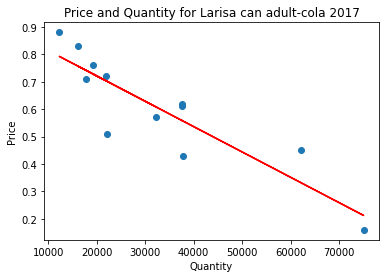

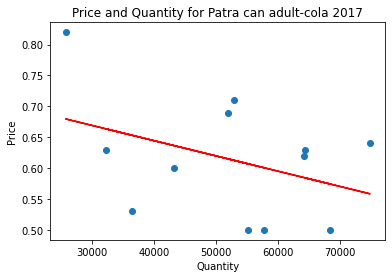

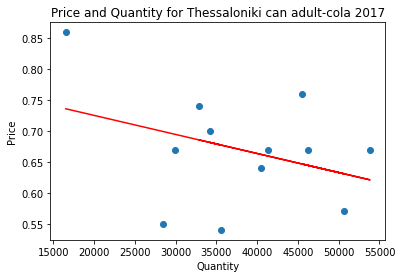

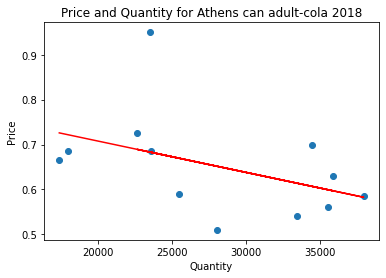

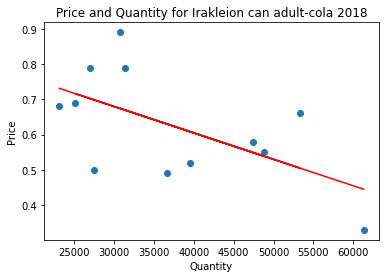

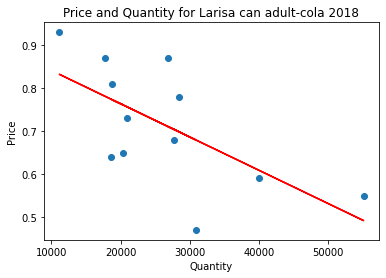

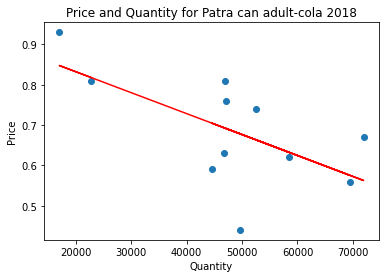

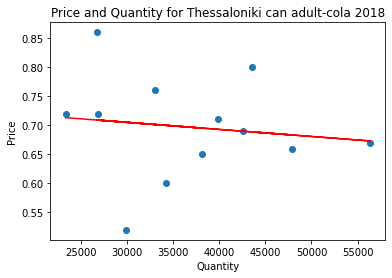

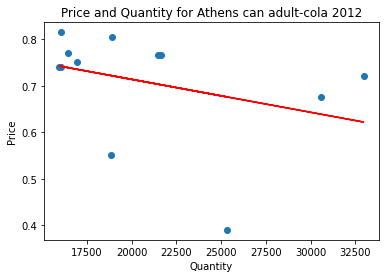

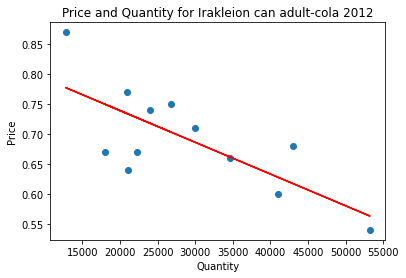

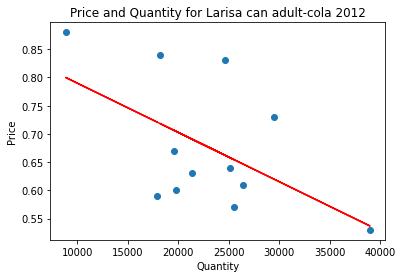

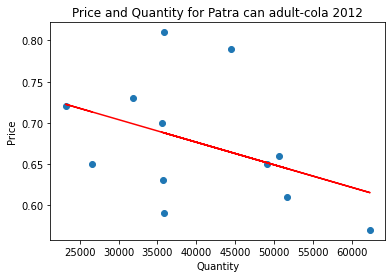

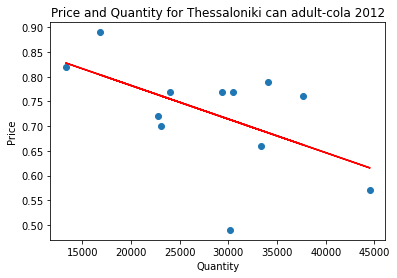

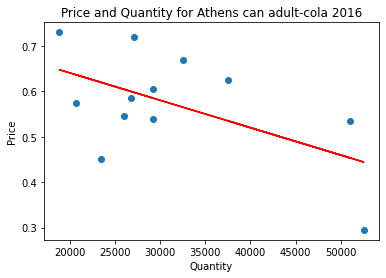

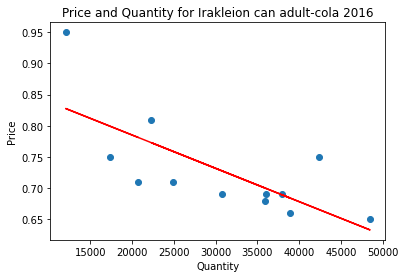

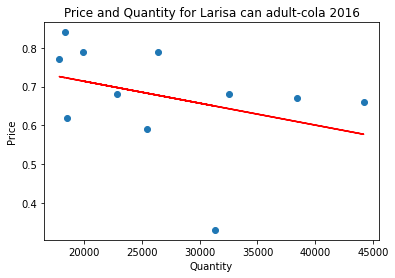

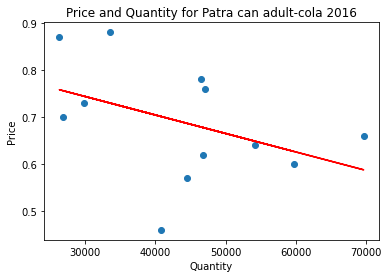

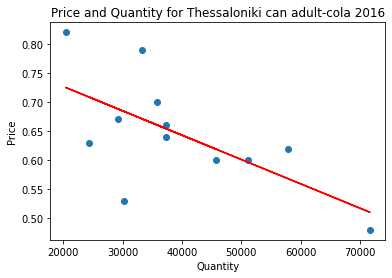

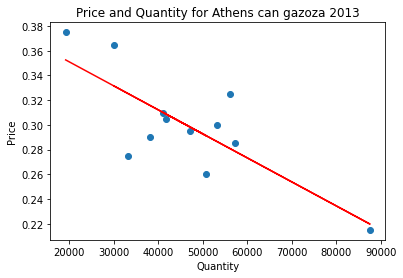

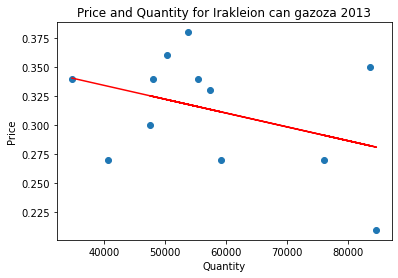

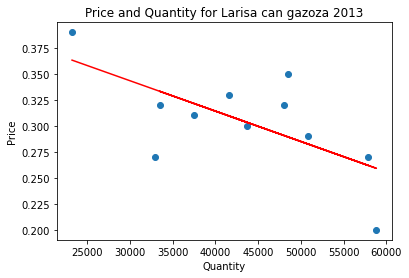

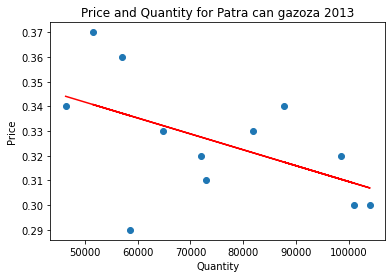

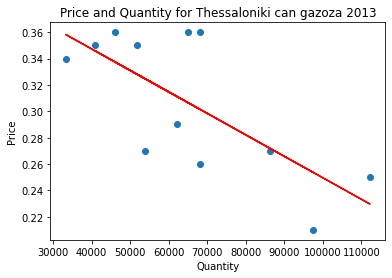

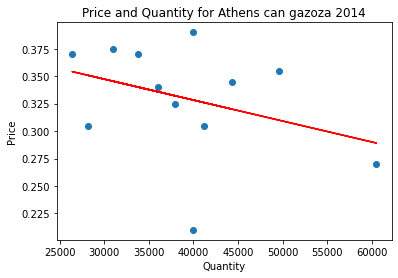

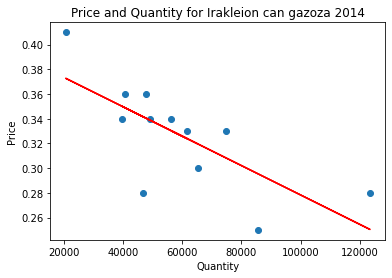

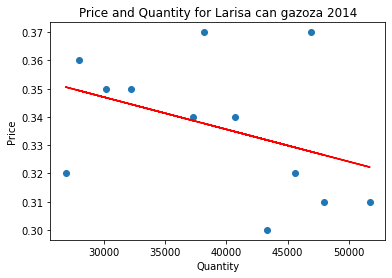

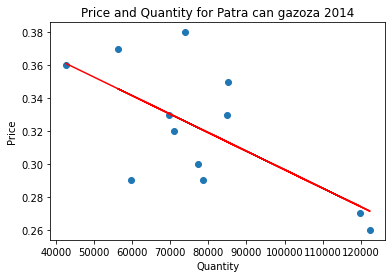

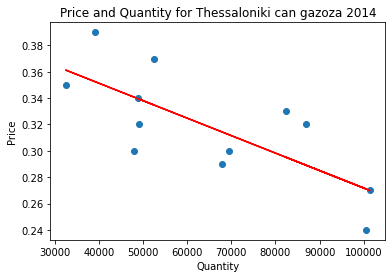

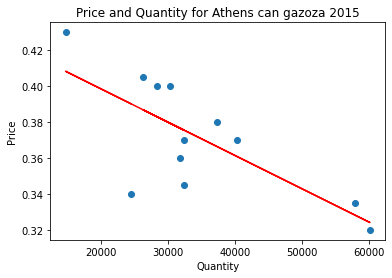

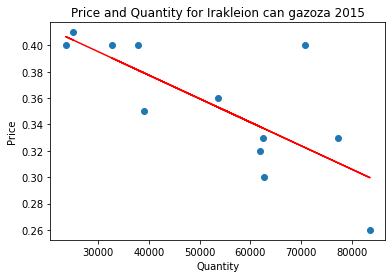

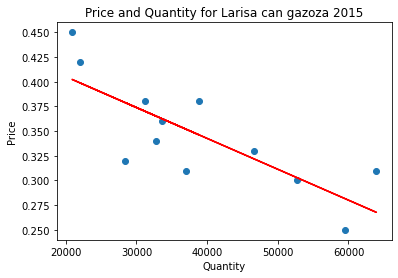

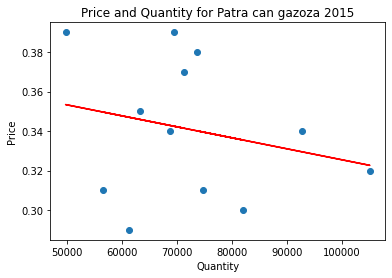

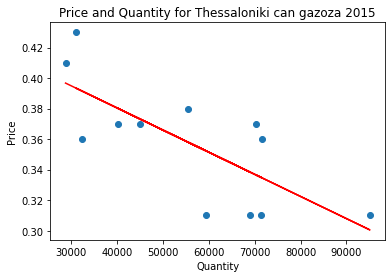

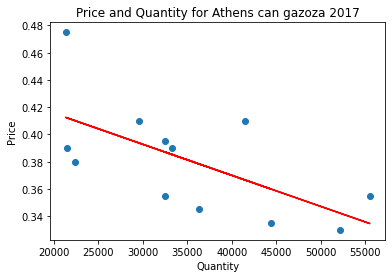

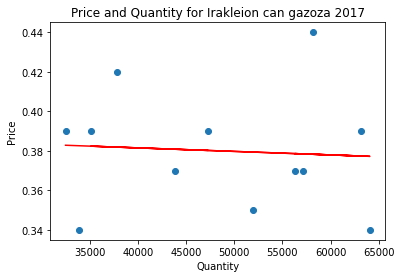

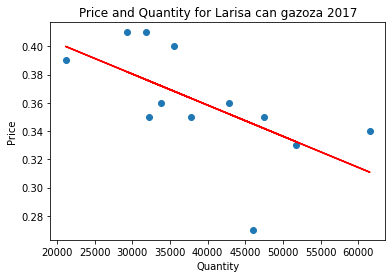

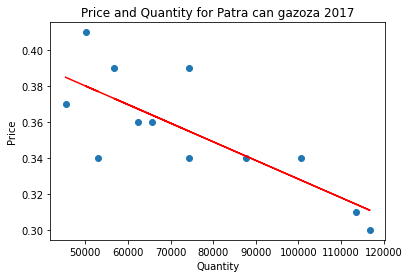

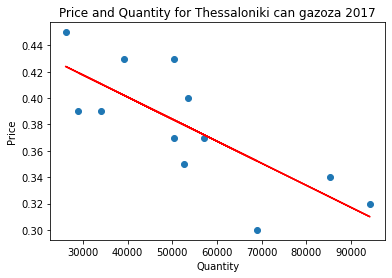

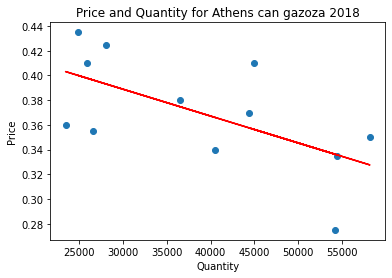

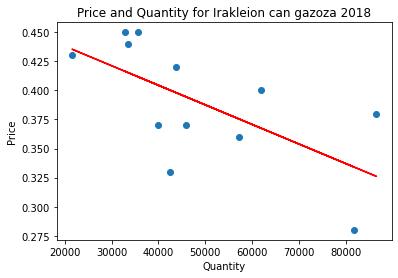

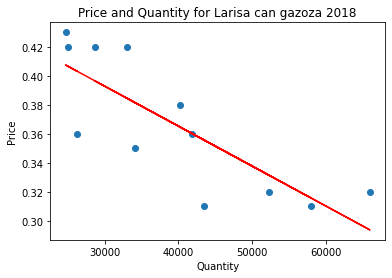

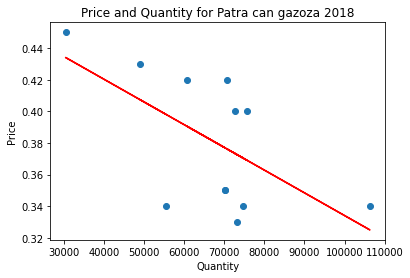

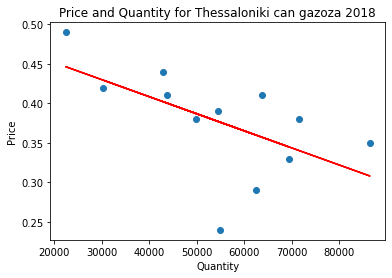

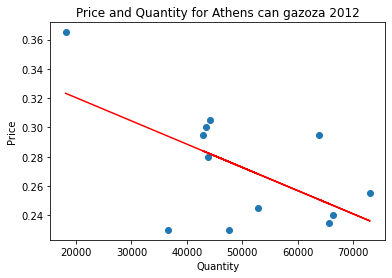

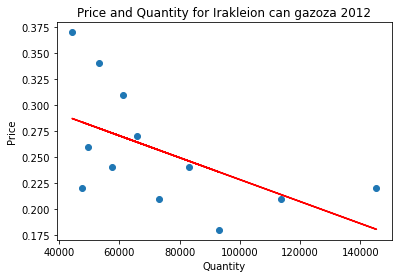

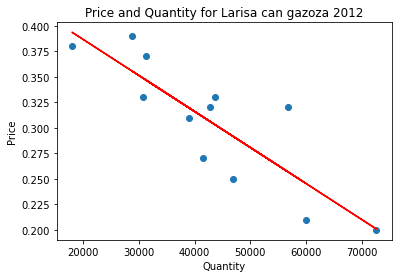

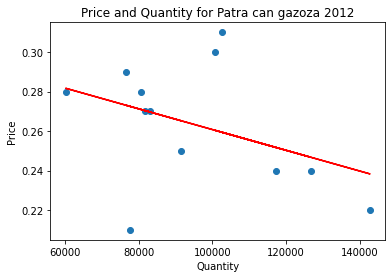

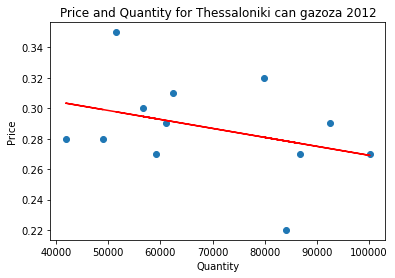

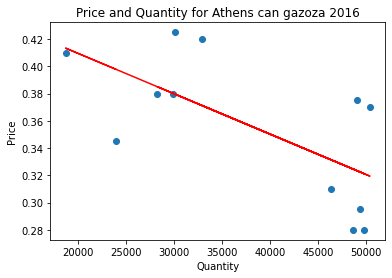

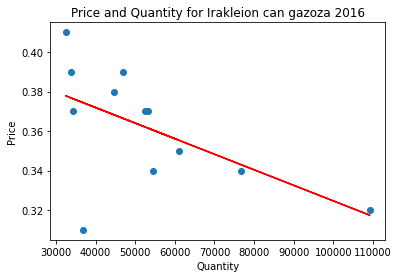

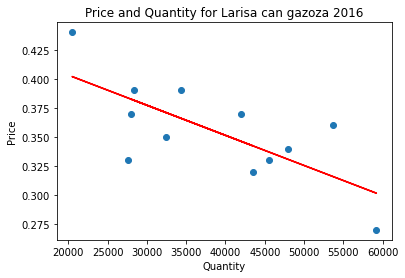

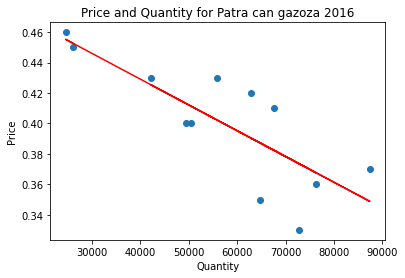

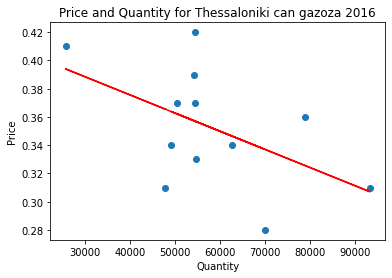

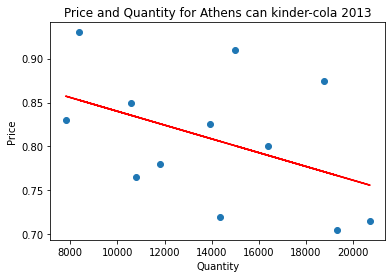

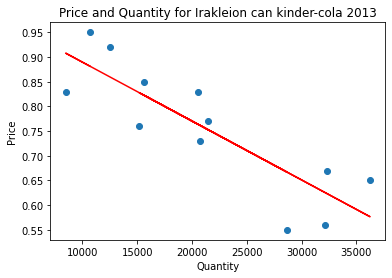

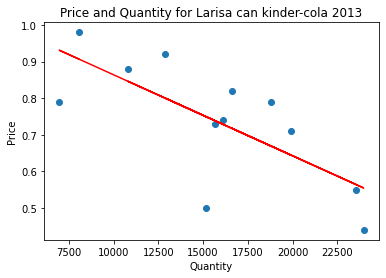

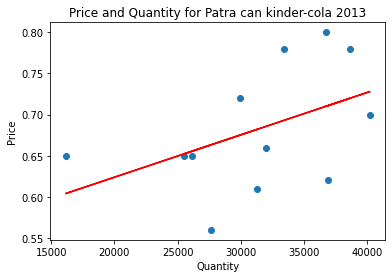

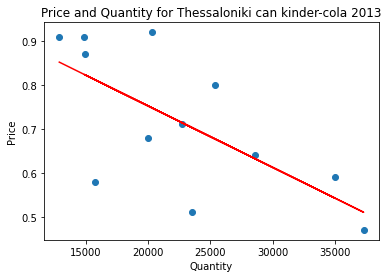

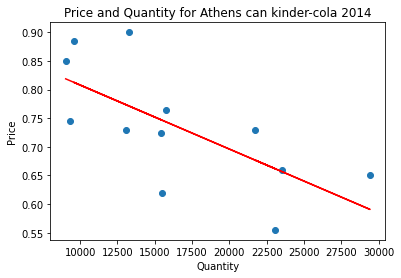

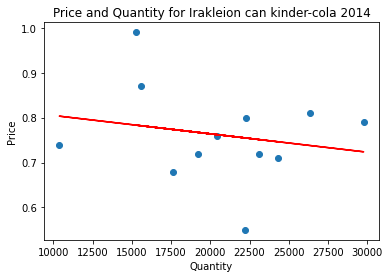

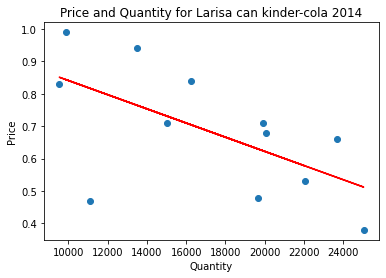

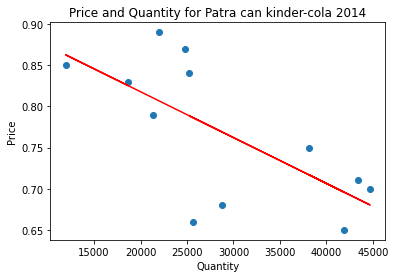

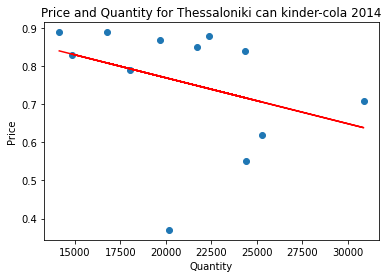

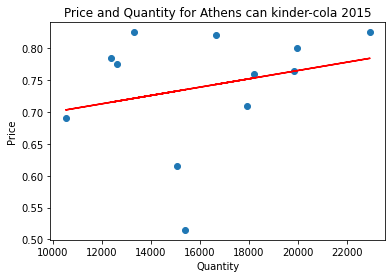

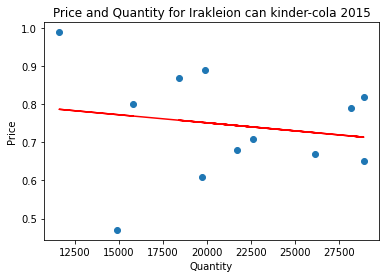

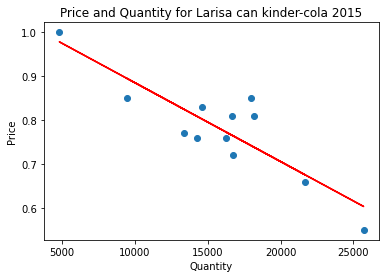

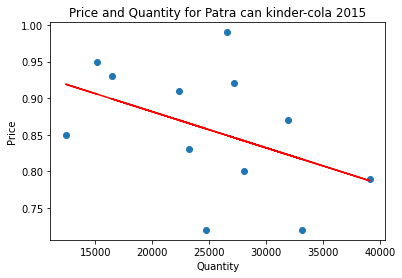

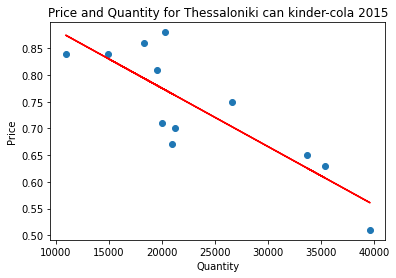

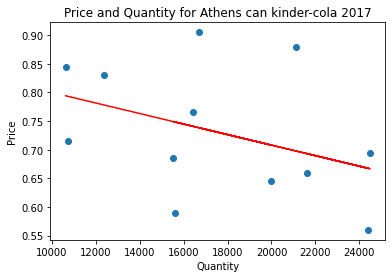

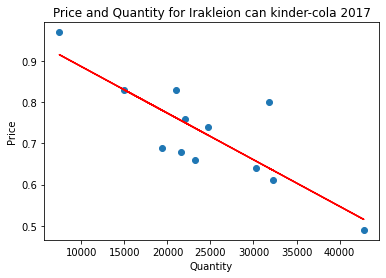

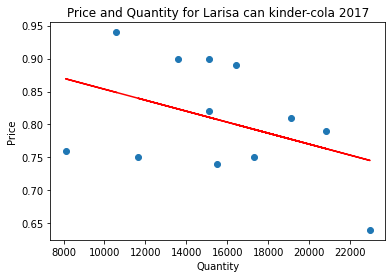

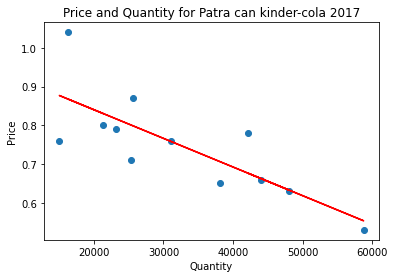

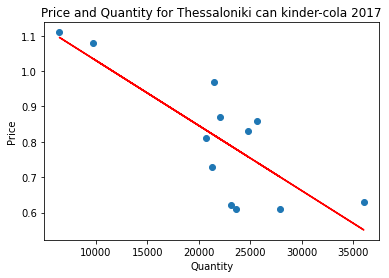

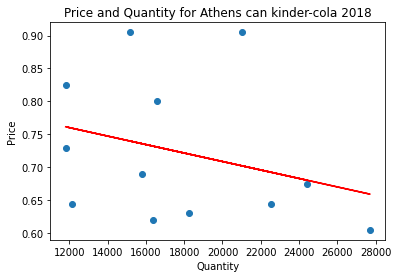

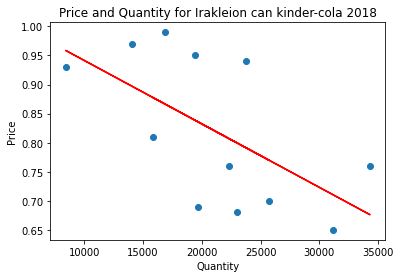

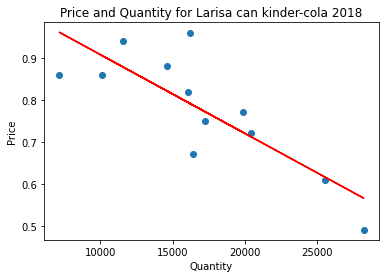

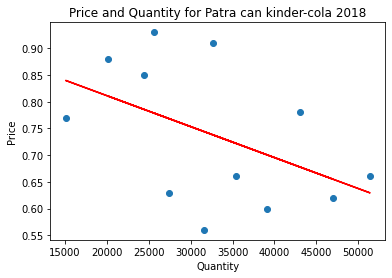

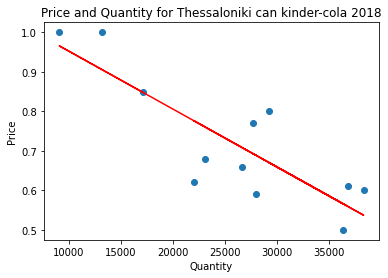

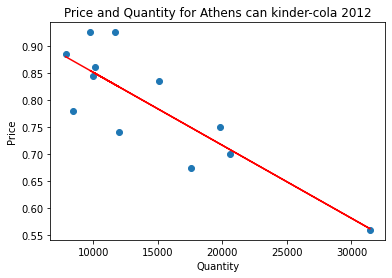

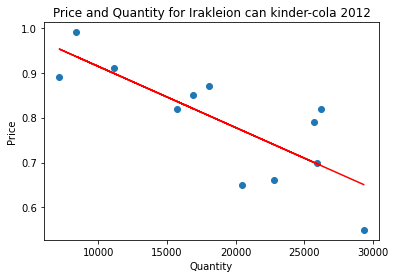

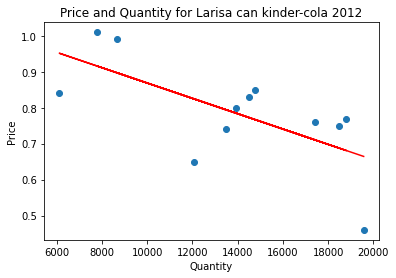

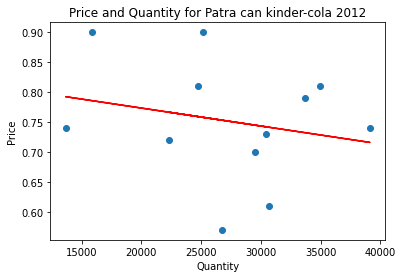

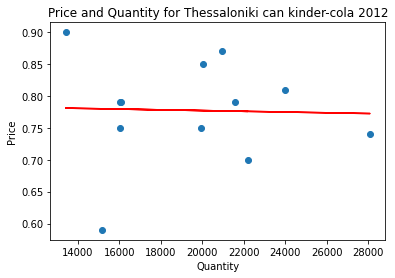

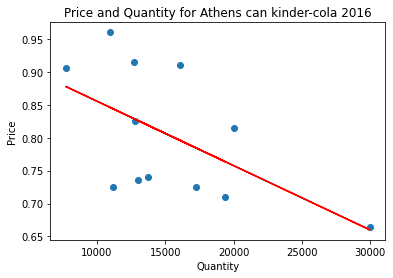

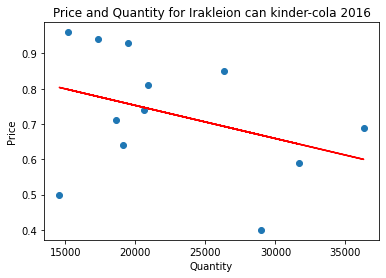

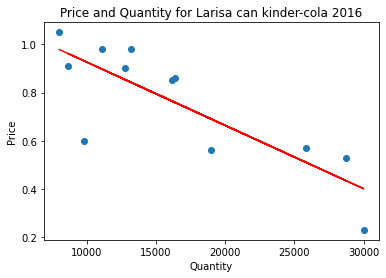

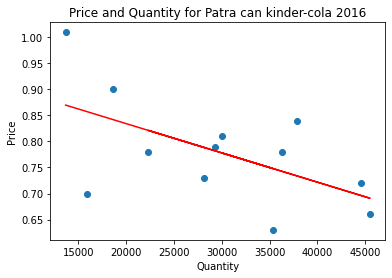

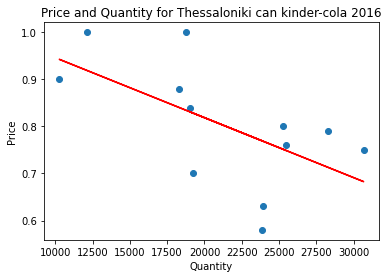

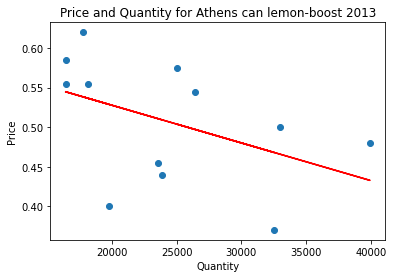

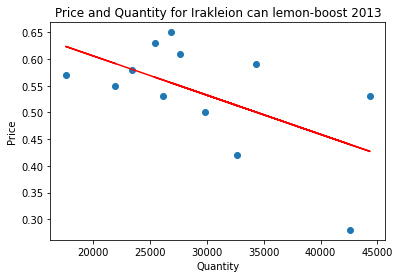

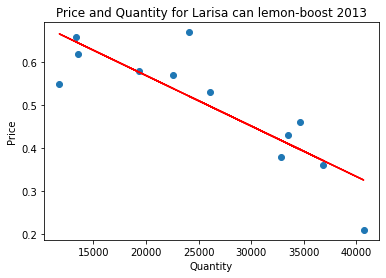

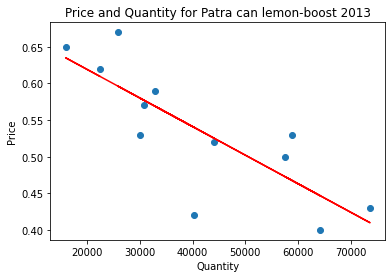

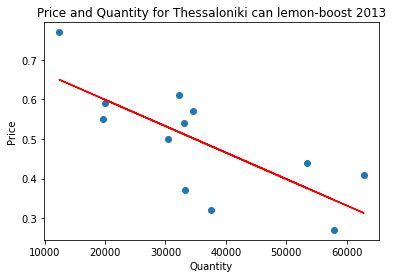

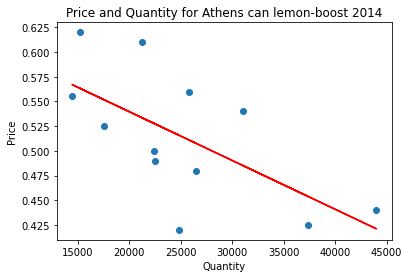

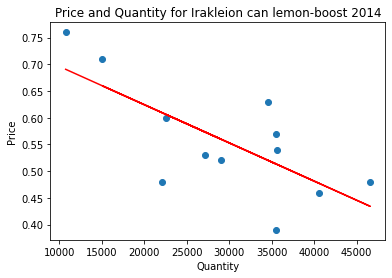

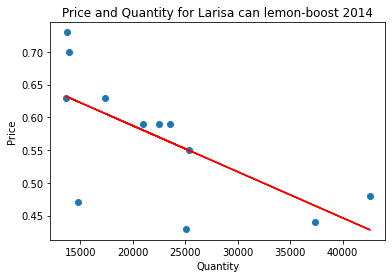

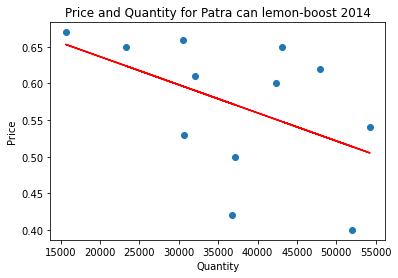

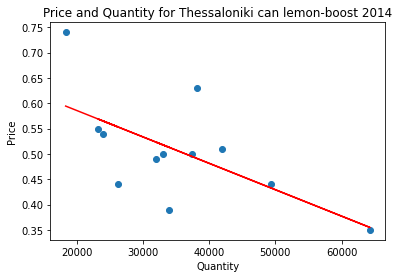

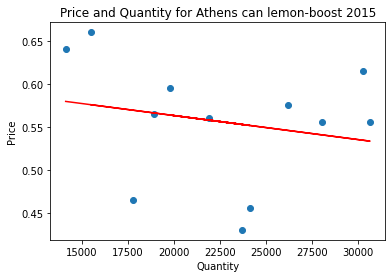

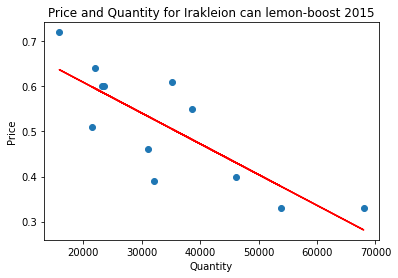

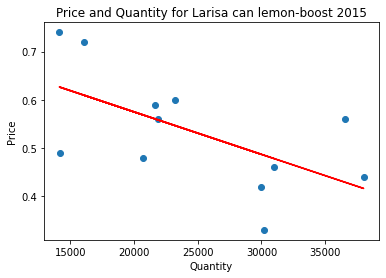

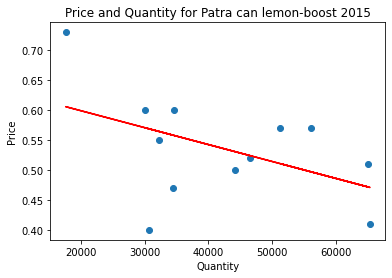

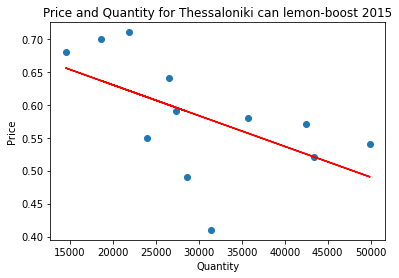

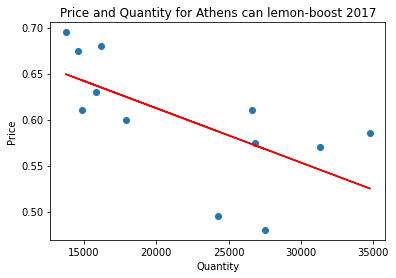

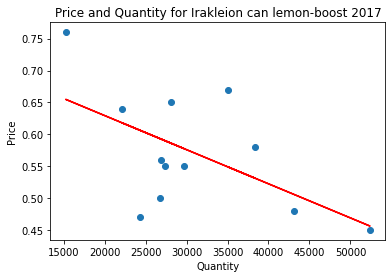

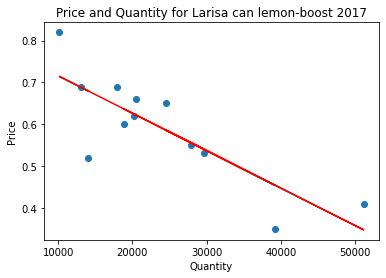

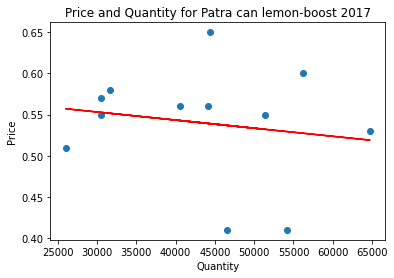

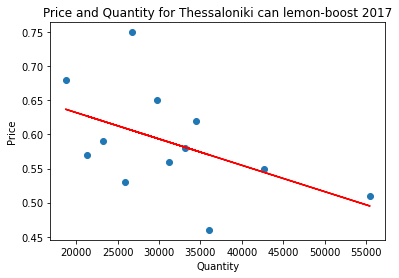

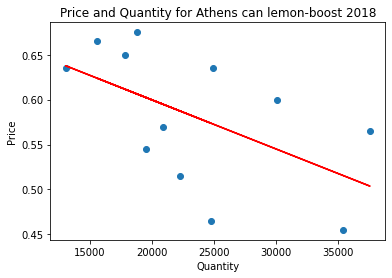

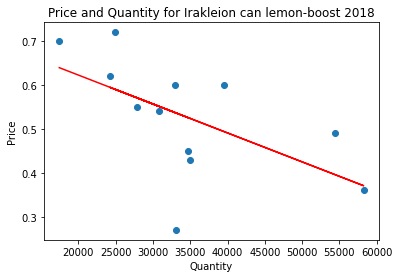

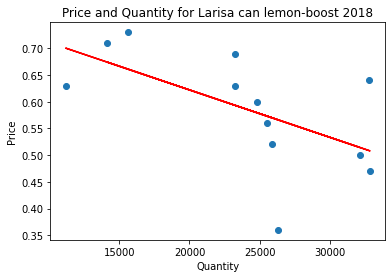

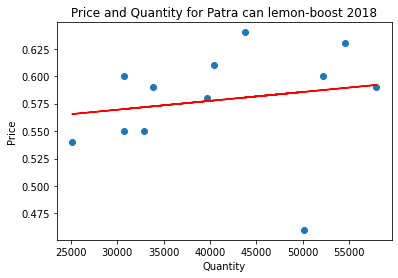

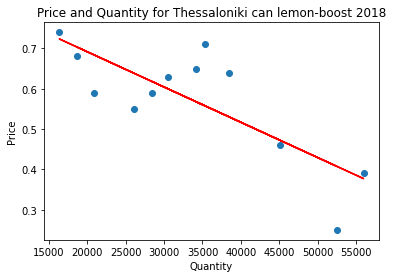

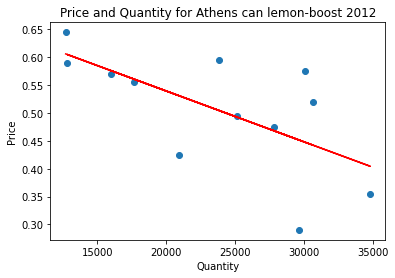

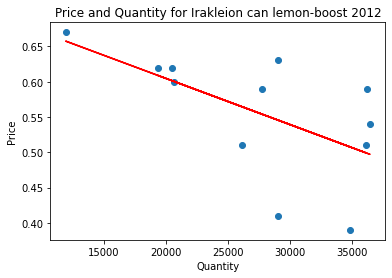

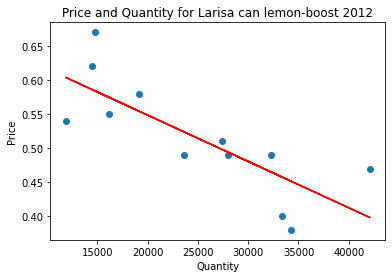

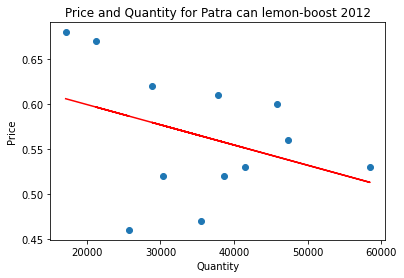

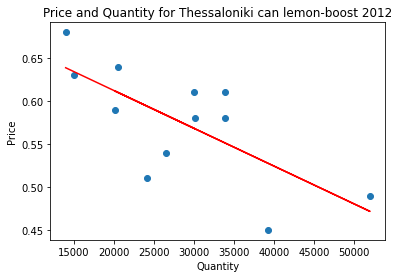

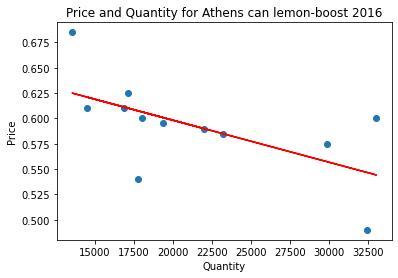

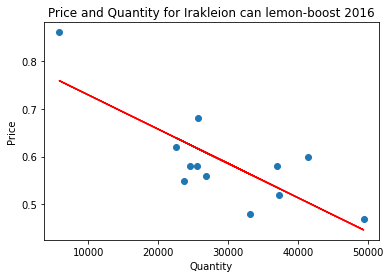

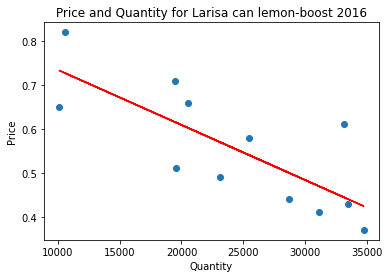

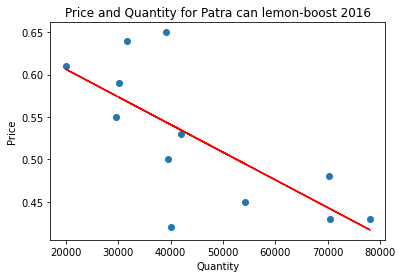

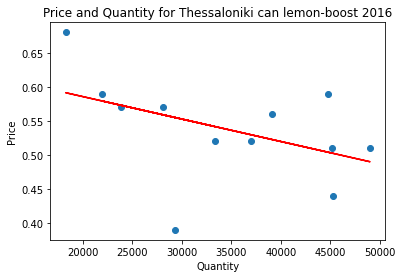

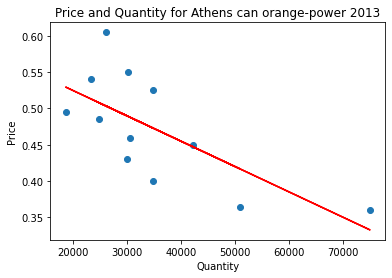

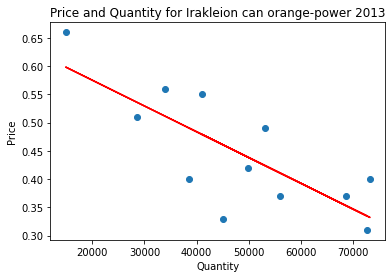

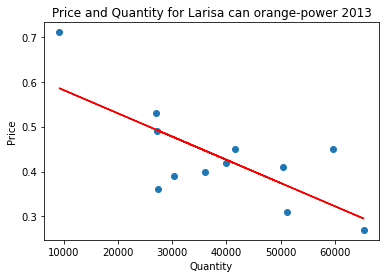

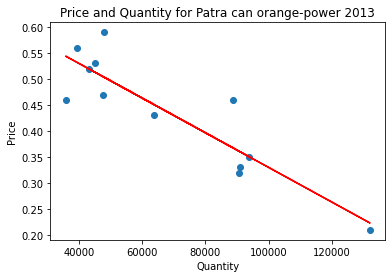

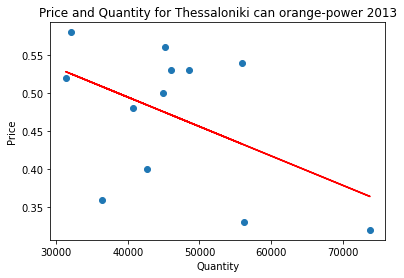

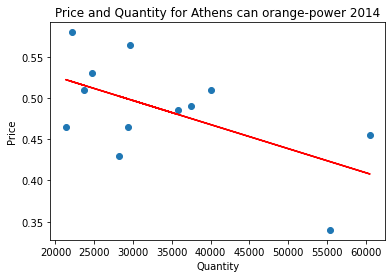

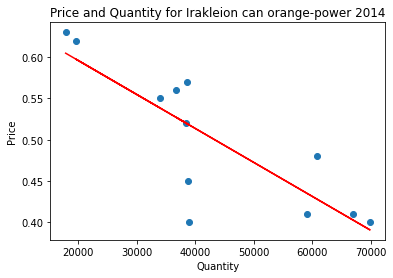

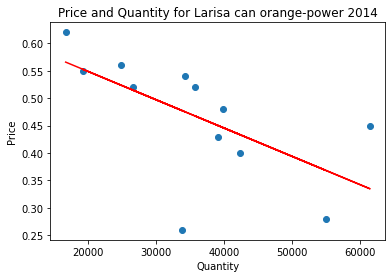

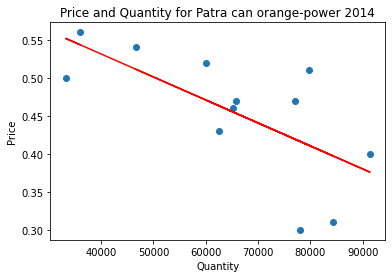

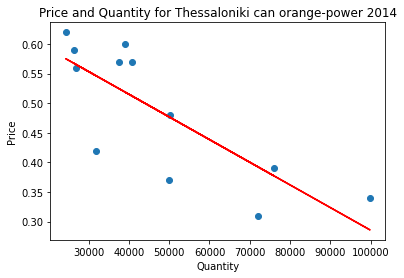

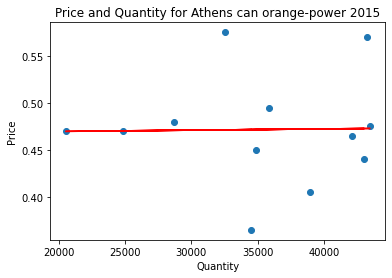

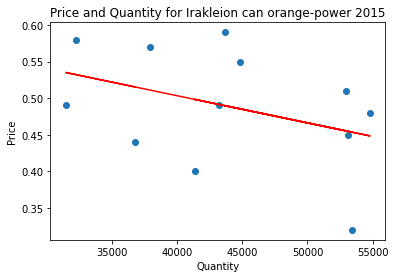

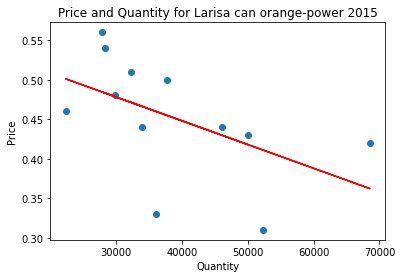

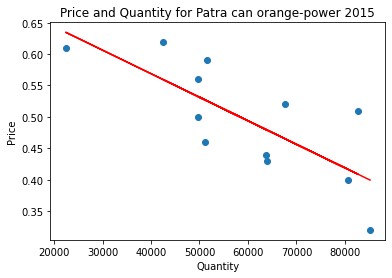

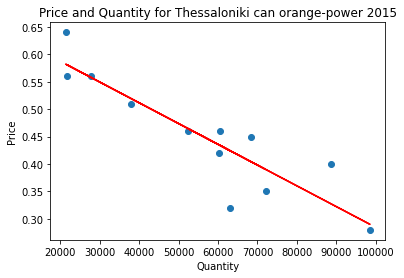

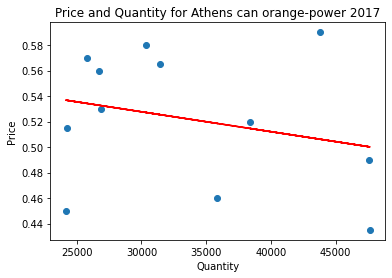

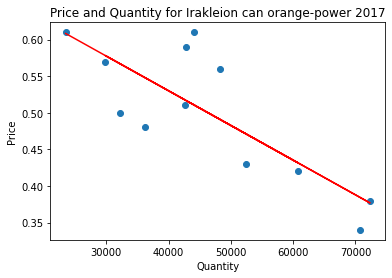

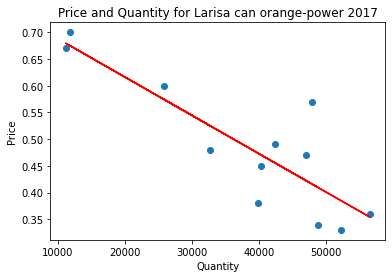

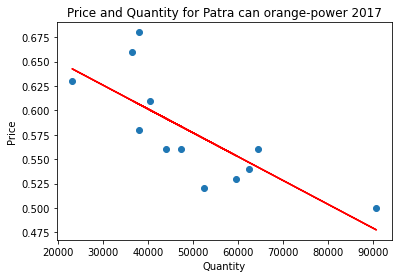

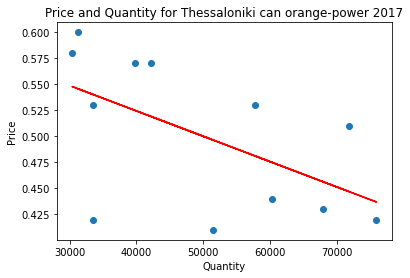

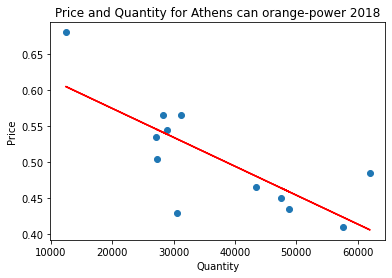

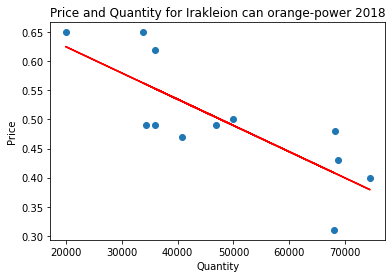

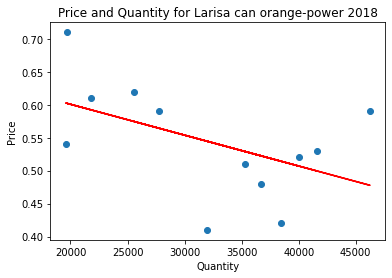

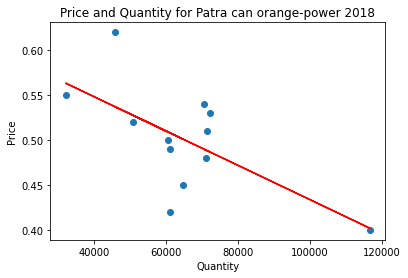

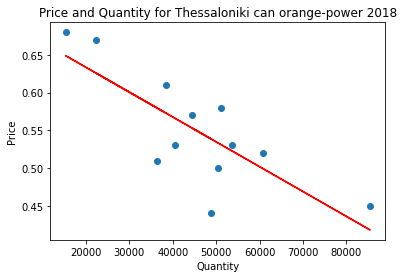

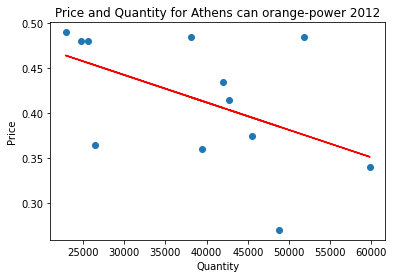

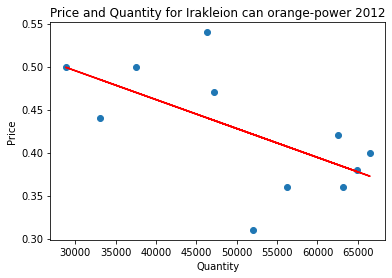

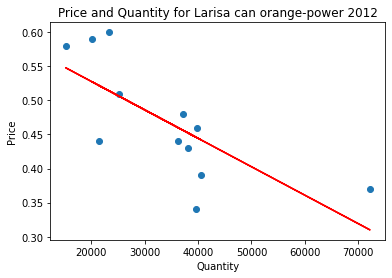

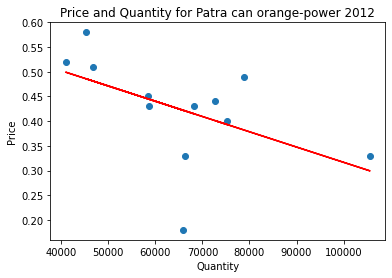

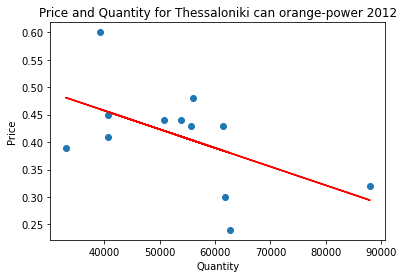

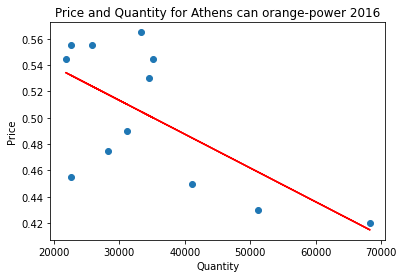

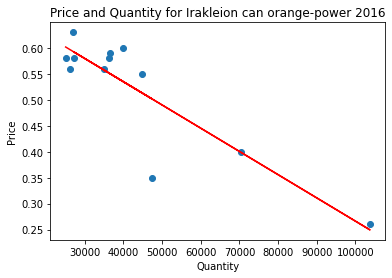

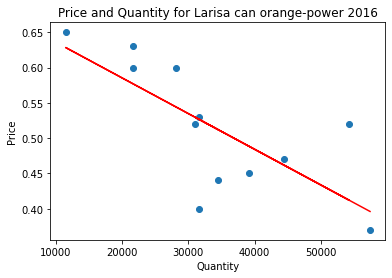

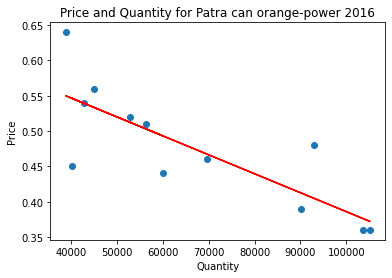

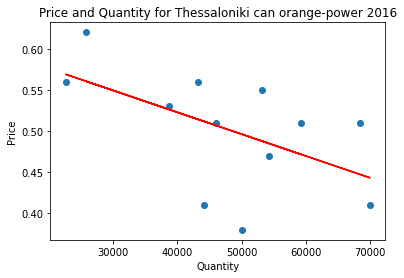

In [ ]:
brands = df['brand'].unique()
years = df['year'].unique()
cities = df['city'].unique()
containers = df['container'].unique()

for b in brands:
  for y in years:
    for cy in cities:
      market_regression(city=cy, container='can', brand=b, year=y)